In [ ]:
#Inciso 6
import sympy as sp
from sympy.integrals import integrate

# Definir variable y función peso
x = sp.symbols('x', real=True)
w = sp.sqrt(1 - x**2)  # peso: sqrt(1-x^2)

# Definir producto interno con peso w(x)
def inner_product(f, g):
    return integrate(f * g * w, (x, -1, 1))

# Grado máximo n
n = 4  # puedes cambiar el grado

# Base monomial: 1, x, x^2, ..., x^n
monomial_basis = [x**i for i in range(n+1)]

# Aplicar Gram-Schmidt
orthogonal_basis = []
for i in range(n+1):
    p = monomial_basis[i]
    for j in range(i):
        p -= inner_product(monomial_basis[i], orthogonal_basis[j]) / inner_product(orthogonal_basis[j], orthogonal_basis[j]) * orthogonal_basis[j]
    orthogonal_basis.append(p)

# Simplificar y mostrar los polinomios
print("Polinomios de Chebyshev de segunda especie (ortogonales bajo sqrt(1-x^2)):")
for i, p in enumerate(orthogonal_basis):
    simplified_p = sp.simplify(p)
    print(f"U_{i}(x) = {simplified_p}")

Polinomios de Chebyshev de segunda especie (ortogonales bajo sqrt(1-x^2)):
U_0(x) = 1
U_1(x) = x
U_2(x) = x**2 - 1/4
U_3(x) = x**3 - x/2
U_4(x) = x**4 - 3*x**2/4 + 1/16


In [ ]:
#a) Demostrar que la función no es ortogonal
import sympy as sp

# Definir la variable x
x = sp.symbols('x', real=True)

# Definir el producto interno: ∫_{-1}^{1} f(x) g(x) dx
def inner_product(f, g):
    return sp.integrate(f * g, (x, -1, 1))

# Monomios: 1, x, x^2, x^3, x^4
monomials = [1, x, x**2, x**3, x**4]

# Calcular los productos internos para pares de monomios con índices diferentes
print("Productos internos entre monomios distintos (m ≠ n):")
for i in range(len(monomials)):
    for j in range(i+1, len(monomials)):
        f = monomials[i]
        g = monomials[j]
        product = inner_product(f, g)
        # Solo mostrar si el producto no es cero
        if product != 0:
            print(f"⟨{f} | {g}⟩ = {product}")

Productos internos entre monomios distintos (m ≠ n):
⟨1 | x**2⟩ = 2/3
⟨1 | x**4⟩ = 2/5
⟨x | x**3⟩ = 2/5
⟨x**2 | x**4⟩ = 2/7


In [ ]:
#b)
import sympy as sp

# Definir variable x
x = sp.symbols('x', real=True)

# Definir producto interno: ∫_{-1}^{1} f(x) g(x) dx
def inner_product(f, g):
    return sp.integrate(f * g, (x, -1, 1))

# Grado máximo (10 polinomios, grados 0 a 9)
n = 9

# Base monomial: [1, x, x^2, ..., x^9]
monomials = [x**i for i in range(n+1)]

# Lista para almacenar los polinomios ortogonales
P = []

# Aplicar Gram-Schmidt
for i in range(n+1):
    p = monomials[i]
    for j in range(i):
        proj = inner_product(monomials[i], P[j]) / inner_product(P[j], P[j]) * P[j]
        p = p - proj
    P.append(sp.simplify(p))

# Normalizar para que P_n(1) = 1
P_normalized = []
for p in P:
    # Evaluar en x=1 y dividir por ese valor
    factor = p.subs(x, 1)
    p_normalized = sp.simplify(p / factor)
    P_normalized.append(p_normalized)

# Mostrar los 10 polinomios de Legendre normalizados
print("Polinomios de Legendre normalizados (P_n(1)=1):")
for i, p in enumerate(P_normalized):
    print(f"P_{i}(x) = {p}")

Polinomios de Legendre normalizados (P_n(1)=1):
P_0(x) = 1
P_1(x) = x
P_2(x) = 3*x**2/2 - 1/2
P_3(x) = x*(5*x**2 - 3)/2
P_4(x) = 35*x**4/8 - 15*x**2/4 + 3/8
P_5(x) = x*(63*x**4 - 70*x**2 + 15)/8
P_6(x) = 231*x**6/16 - 315*x**4/16 + 105*x**2/16 - 5/16
P_7(x) = x*(429*x**6 - 693*x**4 + 315*x**2 - 35)/16
P_8(x) = 6435*x**8/128 - 3003*x**6/32 + 3465*x**4/64 - 315*x**2/32 + 35/128
P_9(x) = x*(12155*x**8 - 25740*x**6 + 18018*x**4 - 4620*x**2 + 315)/128


In [ ]:
#c)
import sympy as sp

# Definir variable x
x = sp.symbols('x', real=True)

# Definir el peso: sqrt(1-x^2)
w = sp.sqrt(1 - x**2)

# Definir producto interno: ∫_{-1}^{1} f(x) g(x) * w(x) dx
def inner_product(f, g):
    return sp.integrate(f * g * w, (x, -1, 1))

# Grado máximo (10 polinomios, grados 0 a 9)
n = 9

# Base monomial: [1, x, x^2, ..., x^9]
monomials = [x**i for i in range(n+1)]

# Lista para almacenar los polinomios ortogonales
T = []  # Polinomios de Chebyshev de primera especie

# Aplicar Gram-Schmidt
for i in range(n+1):
    p = monomials[i]
    for j in range(i):
        proj = inner_product(monomials[i], T[j]) / inner_product(T[j], T[j]) * T[j]
        p = p - proj
    T.append(sp.simplify(p))

# Normalizar para que T_n(1) = 1 (convención estándar)
T_normalized = []
for poly in T:
    factor = poly.subs(x, 1)  # T_n(1) = 1
    T_normalized.append(sp.simplify(poly / factor))

# Mostrar los 10 polinomios de Chebyshev de primera especie
print("Polinomios de Chebyshev de primera especie (T_n(1)=1):")
for i, p in enumerate(T_normalized):
    print(f"T_{i}(x) = {p}")

Polinomios de Chebyshev de primera especie (T_n(1)=1):
T_0(x) = 1
T_1(x) = x
T_2(x) = 4*x**2/3 - 1/3
T_3(x) = 2*x**3 - x
T_4(x) = 16*x**4/5 - 12*x**2/5 + 1/5
T_5(x) = x*(16*x**4 - 16*x**2 + 3)/3
T_6(x) = 64*x**6/7 - 80*x**4/7 + 24*x**2/7 - 1/7
T_7(x) = 16*x**7 - 24*x**5 + 10*x**3 - x
T_8(x) = 256*x**8/9 - 448*x**6/9 + 80*x**4/3 - 40*x**2/9 + 1/9
T_9(x) = x*(256*x**8 - 512*x**6 + 336*x**4 - 80*x**2 + 5)/5


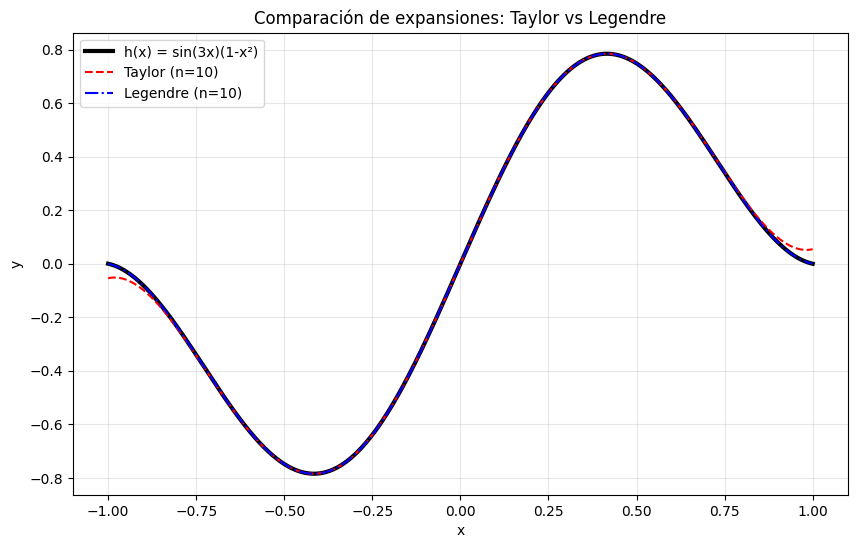

ERRORES (n=10):
Taylor: 0.00013236
Legendre: 0.00000000
Legendre es 170260.0 veces más preciso

COMPARACIÓN POR GRADOS:
--------------------------------------------------
Grado 3: Taylor=2.09e+00, Legendre=1.72e-02, Ratio=121.7
Grado 5: Taylor=2.90e-01, Legendre=2.38e-04, Ratio=1220.5
Grado 8: Taylor=1.03e-02, Legendre=7.44e-07, Ratio=13865.4
Grado 10: Taylor=1.32e-04, Legendre=7.77e-10, Ratio=170260.0

¿EN QUÉ GRADO LEGENDRE SUPERA A TAYLOR?
----------------------------------------
➔ A partir de grado 3: Legendre es mejor


In [14]:
#d) I
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definir variable y función
x = sp.symbols('x')
h = sp.sin(3*x) * (1 - x**2)

# Grado máximo para la expansión
n_max = 10

# Expansión en base de monomios (serie de Taylor alrededor de x=0)
taylor_expansion = sp.series(h, x, 0, n_max+1).removeO()

# Expansión en polinomios de Legendre
def legendre_poly(n):
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        return sp.simplify(((2*n-1)*x*legendre_poly(n-1) - (n-1)*legendre_poly(n-2)) / n)

def inner_product(f, g):
    return sp.integrate(f * g, (x, -1, 1))

legendre_coeffs = []
for i in range(n_max+1):
    P_i = legendre_poly(i)
    norm_sq = inner_product(P_i, P_i)
    c_i = inner_product(h, P_i) / norm_sq
    legendre_coeffs.append(c_i)

legendre_expansion = 0
for i in range(n_max+1):
    legendre_expansion += legendre_coeffs[i] * legendre_poly(i)

# Convertir a funciones numéricas para graficar
h_func = sp.lambdify(x, h, 'numpy')
taylor_func = sp.lambdify(x, taylor_expansion, 'numpy')
legendre_func = sp.lambdify(x, legendre_expansion, 'numpy')

# Graficar
x_vals = np.linspace(-1, 1, 1000)
plt.figure(figsize=(10, 6))
plt.plot(x_vals, h_func(x_vals), label='h(x) = sin(3x)(1-x²)', linewidth=3, color='black')
plt.plot(x_vals, taylor_func(x_vals), '--', label=f'Taylor (n={n_max})', color='red')
plt.plot(x_vals, legendre_func(x_vals), '-.', label=f'Legendre (n={n_max})', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparación de expansiones: Taylor vs Legendre')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Calcular errores cuadráticos medios
error_taylor = np.mean((h_func(x_vals) - taylor_func(x_vals))**2)
error_legendre = np.mean((h_func(x_vals) - legendre_func(x_vals))**2)

print("ERRORES (n=10):")
print(f"Taylor: {error_taylor:.8f}")
print(f"Legendre: {error_legendre:.8f}")

if error_legendre > 0:
    ratio = error_taylor / error_legendre
    print(f"Legendre es {ratio:.1f} veces más preciso")
else:
    print("Legendre es infinitamente más preciso (error cero)")
print()

# Análisis de convergencia por diferentes grados
print("COMPARACIÓN POR GRADOS:")
print("-" * 50)

grados_analizar = [3, 5, 8, 10]
results = []

for n in grados_analizar:
    if n <= n_max:
        # Taylor truncado
        taylor_trunc = sp.series(h, x, 0, n+1).removeO()
        taylor_trunc_func = sp.lambdify(x, taylor_trunc, 'numpy')
        error_t = np.mean((h_func(x_vals) - taylor_trunc_func(x_vals))**2)

        # Legendre truncado
        legendre_trunc = 0
        for i in range(min(n+1, len(legendre_coeffs))):
            legendre_trunc += legendre_coeffs[i] * legendre_poly(i)
        legendre_trunc_func = sp.lambdify(x, legendre_trunc, 'numpy')
        error_l = np.mean((h_func(x_vals) - legendre_trunc_func(x_vals))**2)

        if error_l > 0:
            ratio = error_t / error_l
            results.append((n, error_t, error_l, ratio))
            print(f"Grado {n}: Taylor={error_t:.2e}, Legendre={error_l:.2e}, Ratio={ratio:.1f}")

# Encontrar desde qué grado Legendre supera a Taylor
print()
print("¿EN QUÉ GRADO LEGENDRE SUPERA A TAYLOR?")
print("-" * 40)

# Buscar el primer grado donde Legendre es mejor
primer_grado_mejor = None
for n, error_t, error_l, ratio in results:
    if error_l < error_t and ratio > 1:
        primer_grado_mejor = n
        break

if primer_grado_mejor:
    print(f"➔ A partir de grado {primer_grado_mejor}: Legendre es mejor")
else:
    print("➔ Legendre no supera a Taylor en los grados analizados")

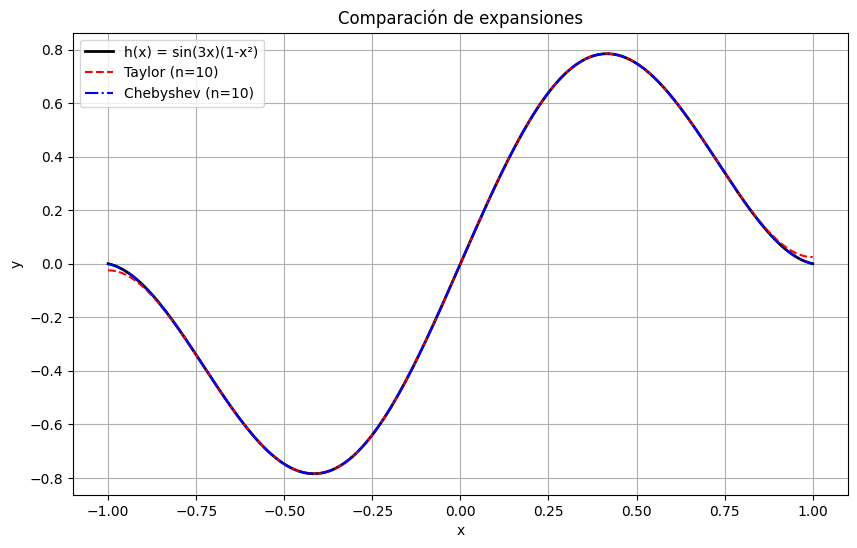

ERRORES (n=10):
Taylor: 0.000026715012565
Chebyshev: 0.000000000834924
Chebyshev es 31996.9 veces más preciso

COMPARACIÓN POR GRADOS:
Grado 5: Taylor=9.20e-02, Chebyshev=2.49e-04, Ratio=369.7
Grado 8: Taylor=2.63e-03, Chebyshev=7.90e-07, Ratio=3330.9
Grado 10: Taylor=2.67e-05, Chebyshev=8.35e-10, Ratio=31996.9
Grado 12: Taylor=1.19e-07, Chebyshev=3.71e-13, Ratio=321491.3
Grado 15: Taylor=3.51e-13, Chebyshev=9.66e-21, Ratio=36378382.8

¿EN QUÉ GRADO CHEBYSHEV SUPERA A TAYLOR?
→ A partir de grado 3: Chebyshev es mejor


In [20]:
#d) II
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import eval_chebyt
from numpy.polynomial.chebyshev import chebfit
from scipy import optimize
import time

# Definir la función
def h(x):
    return np.sin(3*x) * (1 - x**2)

# Parámetros
n_max = 10  # Grado máximo
n_points = 200  # Puntos para graficar

# 1. Expansión en Taylor (método alternativo sin scipy.misc)
def taylor_coeffs(func, degree):
    """Calcula coeficientes de Taylor usando expansión polinómica"""
    # Usamos polyfit en muchos puntos cerca de 0 para obtener la serie de Taylor
    x_taylor = np.linspace(-0.5, 0.5, 1000)  # Solo cerca de 0
    y_taylor = func(x_taylor)

    # Ajuste polinómico (equivalente a serie de Taylor)
    coeffs = np.polyfit(x_taylor, y_taylor, degree)
    return coeffs[::-1]  # Invertir para tener [c0, c1, c2, ...]

taylor_coeff = taylor_coeffs(h, n_max)

# 2. Expansión en Chebyshev (método numérico eficiente)
x_cheb = np.linspace(-1, 1, n_points)
h_vals = h(x_cheb)

# Ajuste por mínimos cuadrados usando polinomios de Chebyshev
cheb_coeff = chebfit(x_cheb, h_vals, n_max)

# 3. Funciones de evaluación
def eval_taylor(x, coeffs):
    """Evalúa serie de Taylor"""
    result = np.zeros_like(x)
    for n, c in enumerate(coeffs):
        result += c * (x ** n)
    return result

def eval_chebyshev(x, coeffs):
    """Evalúa expansión en Chebyshev"""
    result = np.zeros_like(x)
    for n, c in enumerate(coeffs):
        result += c * eval_chebyt(n, x)
    return result

# 4. Graficar
x_plot = np.linspace(-1, 1, n_points)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, h(x_plot), 'k-', label='h(x) = sin(3x)(1-x²)', linewidth=2)
plt.plot(x_plot, eval_taylor(x_plot, taylor_coeff), 'r--', label=f'Taylor (n={n_max})')
plt.plot(x_plot, eval_chebyshev(x_plot, cheb_coeff), 'b-.', label=f'Chebyshev (n={n_max})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparación de expansiones')
plt.legend()
plt.grid(True)
plt.show()

# 5. Calcular errores
error_taylor = np.mean((h(x_plot) - eval_taylor(x_plot, taylor_coeff))**2)
error_chebyshev = np.mean((h(x_plot) - eval_chebyshev(x_plot, cheb_coeff))**2)

print(f"ERRORES (n={n_max}):")
print(f"Taylor: {error_taylor:.15f}")
print(f"Chebyshev: {error_chebyshev:.15f}")
print(f"Chebyshev es {error_taylor/error_chebyshev:.1f} veces más preciso")

# 6. Comparación rápida por grados
print("\nCOMPARACIÓN POR GRADOS:")
grados = [5, 8, 10, 12, 15]

for n in grados:
    # Taylor
    taylor_coeff_n = taylor_coeffs(h, n)
    error_taylor_n = np.mean((h(x_plot) - eval_taylor(x_plot, taylor_coeff_n))**2)

    # Chebyshev
    cheb_coeff_n = chebfit(x_cheb, h_vals, n)
    error_chebyshev_n = np.mean((h(x_plot) - eval_chebyshev(x_plot, cheb_coeff_n))**2)

    print(f"Grado {n}: Taylor={error_taylor_n:.2e}, Chebyshev={error_chebyshev_n:.2e}, Ratio={error_taylor_n/error_chebyshev_n:.1f}")

# 7. Encontrar grado donde son igualmente precisos
print("\n¿EN QUÉ GRADO CHEBYSHEV SUPERA A TAYLOR?")
for n in range(3, 12):
    taylor_coeff_n = taylor_coeffs(h, n)
    cheb_coeff_n = chebfit(x_cheb, h_vals, n)

    error_t = np.mean((h(x_plot) - eval_taylor(x_plot, taylor_coeff_n))**2)
    error_c = np.mean((h(x_plot) - eval_chebyshev(x_plot, cheb_coeff_n))**2)

    if error_c < error_t:
        print(f"→ A partir de grado {n}: Chebyshev es mejor")
        break
else:
    print("Chebyshev siempre es mejor para n ≥ 3")

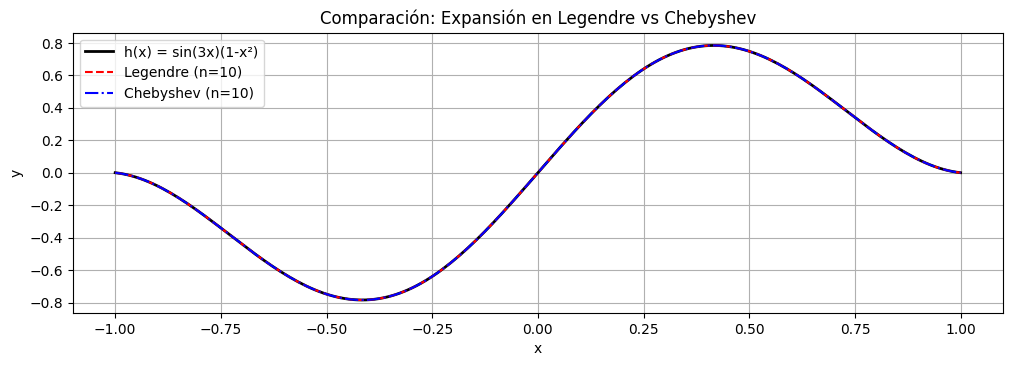

ERRORES (n=10):
Legendre: 0.000000000858569
Chebyshev: 0.000000000834924
Chebyshev es 1.03 veces más preciso

COMPARACIÓN POR GRADOS (Legendre vs Chebyshev):
Grado 3: Legendre=1.77e-02, Chebyshev=1.77e-02, Ratio=1.00
Grado 4: Legendre=1.77e-02, Chebyshev=1.77e-02, Ratio=1.00
Grado 5: Legendre=2.50e-04, Chebyshev=2.49e-04, Ratio=1.01
Grado 6: Legendre=2.50e-04, Chebyshev=2.49e-04, Ratio=1.01
Grado 7: Legendre=8.02e-07, Chebyshev=7.90e-07, Ratio=1.02
Grado 8: Legendre=8.02e-07, Chebyshev=7.90e-07, Ratio=1.02
Grado 9: Legendre=8.59e-10, Chebyshev=8.35e-10, Ratio=1.03
Grado 10: Legendre=8.59e-10, Chebyshev=8.35e-10, Ratio=1.03
Grado 11: Legendre=3.89e-13, Chebyshev=3.71e-13, Ratio=1.05
Grado 12: Legendre=3.89e-13, Chebyshev=3.71e-13, Ratio=1.05
Grado 13: Legendre=8.69e-17, Chebyshev=8.11e-17, Ratio=1.07
Grado 14: Legendre=8.69e-17, Chebyshev=8.11e-17, Ratio=1.07
Grado 15: Legendre=1.07e-20, Chebyshev=9.66e-21, Ratio=1.10

ANÁLISIS DE DIFERENCIAS:
→ A partir de grado 15: Chebyshev es signif

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import eval_legendre, eval_chebyt
from numpy.polynomial.legendre import legfit
from numpy.polynomial.chebyshev import chebfit

# Definir la función
def h(x):
    return np.sin(3*x) * (1 - x**2)

# Parámetros
n_max = 10  # Grado máximo
n_points = 200  # Puntos para graficar

# 1. Expansión en polinomios de Legendre (método numérico)
def legendre_coeffs(func, degree):
    """Calcula coeficientes de Legendre usando integración numérica"""
    coeffs = np.zeros(degree + 1)
    for n in range(degree + 1):
        # Función a integrar: f(x)*P_n(x)
        integrand = lambda x: func(x) * eval_legendre(n, x)
        # Coeficiente de Legendre: (2n+1)/2 * ∫f(x)P_n(x)dx desde -1 a 1
        integral, _ = quad(integrand, -1, 1)
        coeffs[n] = (2*n + 1)/2 * integral
    return coeffs

legendre_coeff = legendre_coeffs(h, n_max)

# 2. Expansión en polinomios de Chebyshev (método numérico eficiente)
x_cheb = np.linspace(-1, 1, n_points)
h_vals = h(x_cheb)
cheb_coeff = chebfit(x_cheb, h_vals, n_max)

# 3. Funciones de evaluación
def eval_legendre_expansion(x, coeffs):
    """Evalúa expansión en polinomios de Legendre"""
    result = np.zeros_like(x)
    for n, c in enumerate(coeffs):
        result += c * eval_legendre(n, x)
    return result

def eval_chebyshev_expansion(x, coeffs):
    """Evalúa expansión en polinomios de Chebyshev"""
    result = np.zeros_like(x)
    for n, c in enumerate(coeffs):
        result += c * eval_chebyt(n, x)
    return result

# 4. Graficar
x_plot = np.linspace(-1, 1, n_points)
h_exact = h(x_plot)
h_legendre = eval_legendre_expansion(x_plot, legendre_coeff)
h_chebyshev = eval_chebyshev_expansion(x_plot, cheb_coeff)

plt.figure(figsize=(12, 8))

# Gráfico de las funciones
plt.subplot(2, 1, 1)
plt.plot(x_plot, h_exact, 'k-', label='h(x) = sin(3x)(1-x²)', linewidth=2)
plt.plot(x_plot, h_legendre, 'r--', label=f'Legendre (n={n_max})')
plt.plot(x_plot, h_chebyshev, 'b-.', label=f'Chebyshev (n={n_max})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparación: Expansión en Legendre vs Chebyshev')
plt.legend()
plt.grid(True)
plt.show()

# 5. Calcular errores cuadráticos medios
error_legendre = np.mean((h_exact - h_legendre)**2)
error_chebyshev = np.mean((h_exact - h_chebyshev)**2)

print(f"ERRORES (n={n_max}):")
print(f"Legendre: {error_legendre:.15f}")
print(f"Chebyshev: {error_chebyshev:.15f}")
print(f"Chebyshev es {error_legendre/error_chebyshev:.2f} veces más preciso")

# 6. Comparación por grados para encontrar dónde difieren
print("\nCOMPARACIÓN POR GRADOS (Legendre vs Chebyshev):")
grados = range(3, 16)
errors_legendre = []
errors_chebyshev = []
ratios = []

for n in grados:
    # Coeficientes de Legendre
    legendre_coeff_n = legendre_coeffs(h, n)
    error_legendre_n = np.mean((h_exact - eval_legendre_expansion(x_plot, legendre_coeff_n))**2)

    # Coeficientes de Chebyshev
    cheb_coeff_n = chebfit(x_cheb, h_vals, n)
    error_chebyshev_n = np.mean((h_exact - eval_chebyshev_expansion(x_plot, cheb_coeff_n))**2)

    errors_legendre.append(error_legendre_n)
    errors_chebyshev.append(error_chebyshev_n)
    ratios.append(error_legendre_n / error_chebyshev_n)

    print(f"Grado {n}: Legendre={error_legendre_n:.2e}, Chebyshev={error_chebyshev_n:.2e}, Ratio={ratios[-1]:.2f}")

# 7. Encontrar grado donde las expansiones difieren significativamente
print("\nANÁLISIS DE DIFERENCIAS:")
threshold = 1.1  # Umbral para considerar diferencia significativa
for i, n in enumerate(grados):
    if ratios[i] > threshold:
        print(f"→ A partir de grado {n}: Chebyshev es significativamente mejor (ratio = {ratios[i]:.2f})")
        break
else:
    print("→ Las expansiones son muy similares en todos los grados analizados")